# Лабораторная работа №.2. Аппроксимации граничных условий второго рода в методе конечных разностей

### Вариант 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = 0
b = 1
k = 0.2
T = 1
h = 0.1
tau = 0.5 * (h**2 / k)
N = int(b / h) + 1
M = int(T / tau) + 1

def phi(x):
    return 1

def g1(t):
    return 2

def g2(t):
    return 3

def f(x, t=0):
    return 1 - x ** 2;

In [2]:
def get_qrid(N, h, M, tau):
    values_x = []
    values_t = []
    for i in range(N + 1):
        values_x.append(i * h)
    for j in range(M + 1):
        values_t.append(j * tau)

    return values_x, values_t

In [3]:
def TDMAsolver(a, b, c, d):
    nf = len(d) 
    ac, bc, cc, dc = map(np.array, (a, b, c, d))
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [4]:
def explicit_method(N, h, M, tau):
    y = np.zeros((N+1, M+1), dtype=float)
    x, t = get_qrid(N,h,M,tau)
    for j in range(1, M + 1):
        y[0][j] = g1(t[j])
        y[-1][j] = g2(t[j])
    for i in range(N + 1):
        y[i][0] = phi(x[i])

    for j in range(M):
        for i in range(1, N):
            y[i][j+1] = (k * tau / h**2) * (y[i-1][j] - 2*y[i][j] + y[i+1][j]) + tau * f(x[i]) + y[i][j]
        y[0][j+1] = g1(t[j+1])
        y[-1][j+1] = g2(t[j+1])

    return x, t, y

In [5]:
def implicit_method(N, h, M, tau):
    x, t = get_qrid(N, h, M, tau)

    y = np.zeros((N+1, M+1), dtype=float)

    for i in range(N + 1):
        y[i][0] = phi(x[i])
    for j in range(1, M + 1):
        y[0][j] = g1(t[j])
        y[-1][j] = g2(t[j])

    for j in range(1, M):
        aa = np.zeros(N-1, dtype=float)
        bb = np.zeros(N, dtype=float)
        cc = np.zeros(N-1, dtype=float)
        dd = np.zeros(N, dtype=float)

        bb[0] = g1(t[j-1])
        for i in range(1, N-1):
            aa[i-1] = -k / h**2
            bb[i] = 1 / tau + 2 * k / h**2
            cc[i] = -k / h**2
            dd[i] = 1 / tau * y[i][j-1] + f(x[i])
        bb[-1] = g2(t[j-1])

        row = TDMAsolver(aa, bb, cc, dd)
        for i in range(N):
            y[i][j] = row[i]

    return x, t, y


In [6]:
def show(x, t, y):
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('y')

    for k in range(0, M, 2):
        y_coef = [y[i][k] for i in range(N + 1)]
        ax.plot3D(x, np.array([t[k]] * (N + 1)), y_coef)
    plt.grid()
    plt.show()

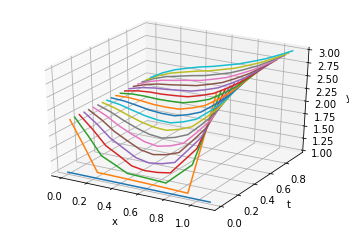

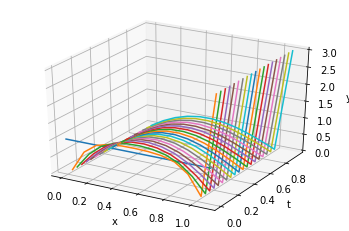

In [7]:
x, t, y = explicit_method(N, h, M, tau) 
show(x,t,y)
x, t, y = implicit_method(N, h, M, tau)
show(x,t,y)